In [1]:
import openai
import pandas as pd
openai.api_key=""#Replace Your API KEY HERE

In [14]:
df=pd.read_csv('new_data.csv',index_col=0)
df.columns=['prompt','completion']
df.head()

,prompt,completion
0,ive been thinking lately about why ive always ...,depression
1,tw assault my dad used to try and stick his f...,ptsd
2,tw panic attacks school failure mention of sui...,ptsd
3,anyone here been on invega before my doctor th...,schizophrenia
4,hey guys i 18f have not been professionally di...,depression


In [15]:
df=df.drop_duplicates()
df.to_json("mentalHealth.jsonl", orient='records', lines=True)

In [ ]:
!openai tools fine_tunes.prepare_data -f mentalHealth.jsonl -q

In [17]:
!openai api fine_tunes.create -t "mentalHealth_prepared_train.jsonl" -v "mentalHealth_prepared_valid.jsonl" --compute_classification_metrics --classification_n_classes 8 -m ada


^C


In [3]:
!openai api fine_tunes.results -i YOUR_MODEL_CREATION_FILE_NAME > result.csv

In [2]:
results =pd.read_csv('result.csv')

In [1]:
results[results['classification/accuracy'].notnull()].tail(1)

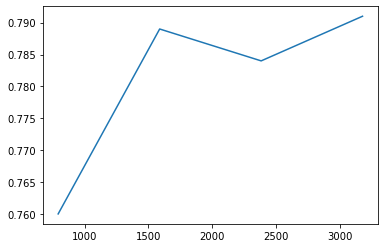

In [16]:
results[results['classification/accuracy'].notnull()]['classification/accuracy'].plot()

In [23]:
test = pd.read_json('mentalHealth_prepared_valid.jsonl', lines=True)
test.head()

,prompt,completion
0,hey guys i 18f have not been professionally di...,depression
1,to be clear i was steeped in bipolar disorder ...,bipolar
2,anyone else have an extremely hard time keepin...,bipolar
3,recently within the last week or so ive been c...,bpd
4,i have had the most difficult 3 years ever sin...,bpd


In [ ]:
def predict(text):
    ft_model ="ada:ft-personal-2022-06-02-09-26-26"
    res = openai.Completion.create(model=ft_model, prompt=text, max_tokens=1, temperature=0.8)
    return res

In [ ]:
send_list=test['prompt'].tolist()
predicted_text=[]
for i in send_list:
    predicted_text.append(predict(i))

In [ ]:
predicted_text